In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned combined data
train = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/bikeshare_weather.csv")
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722 entries, 0 to 8721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8722 non-null   object 
 1   trips                8722 non-null   int64  
 2   Temp (°C)            8722 non-null   float64
 3   Dew Point Temp (°C)  8722 non-null   float64
 4   Rel Hum (%)          8722 non-null   float64
 5   Visibility (km)      8722 non-null   float64
 6   Stn Press (kPa)      8722 non-null   float64
 7   Hmdx                 8722 non-null   float64
 8   Wind Chill           8722 non-null   float64
 9   Strong Wind          8722 non-null   int64  
 10  Fog                  8722 non-null   int64  
 11  Freezing Rain        8722 non-null   int64  
 12  Haze                 8722 non-null   int64  
 13  Heavy Rain           8722 non-null   int64  
 14  Moderate Rain        8722 non-null   int64  
 15  Moderate Snow        8722 non-null   i

In [4]:
train.head()

,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,...,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday
0,2018-01-01 00:00:00,4,-16.2,-20.5,70.0,16.1,102.13,0.0,-22.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018-01-01 01:00:00,10,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018-01-01 02:00:00,6,-17.3,-20.8,75.0,16.1,102.15,0.0,-26.0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-01 03:00:00,14,-17.9,-21.6,73.0,16.1,102.13,0.0,-24.0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018-01-01 04:00:00,6,-17.2,-21.1,72.0,16.1,102.09,0.0,-21.0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Scale numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train.columns

Index(['date', 'trips', 'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday'],
      dtype='object')

In [7]:
num_vars = ['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 
            'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [8]:
train.head()

,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,...,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday
0,2018-01-01 00:00:00,4,0.107750,0.139847,0.638554,1.0,0.748614,0.0,0.31250,0,...,0,0,0,0,0,0,0,0,0,1
1,2018-01-01 01:00:00,10,0.096408,0.128352,0.638554,1.0,0.743068,0.0,0.37500,0,...,0,0,0,0,0,0,0,0,0,1
2,2018-01-01 02:00:00,6,0.086957,0.134100,0.698795,1.0,0.752311,0.0,0.18750,0,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-01 03:00:00,14,0.075614,0.118774,0.674699,1.0,0.748614,0.0,0.25000,0,...,0,0,0,0,0,0,0,0,0,1
4,2018-01-01 04:00:00,6,0.088847,0.128352,0.662651,1.0,0.741220,0.0,0.34375,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
X,y =train[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday']].values,train['trips'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 6105 rows
Test Set: 2617 rows


## Linear Regression Model (First Trial)

In [12]:
from sklearn.linear_model import LinearRegression 

In [13]:
model = LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [15]:
prediction = model.predict(X_test)
print('Predicted Trips: ' , np.round(prediction)[:10] )
print('Actual Trips: ' , y_test[:10])

Predicted Trips:  [108. 191. 196. 133. 104.  70. 132. 129. 513. 534.]
Actual Trips:  [  4 163 158  75   3 112 112 165 640 394]


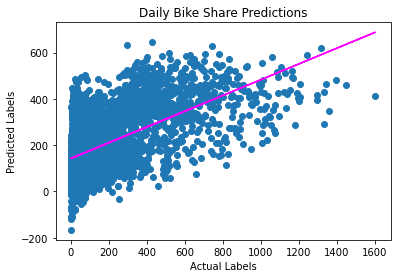

In [18]:
%matplotlib inline
plt.scatter(y_test,prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

C:\Users\on3_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


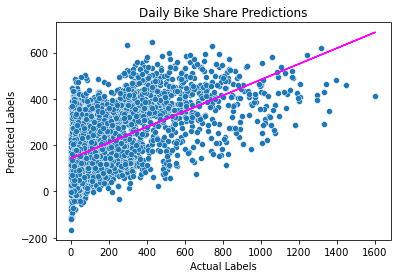

In [21]:
sns.scatterplot(y_test,prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test,prediction)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, prediction)
print("R2:", r2)

MSE: 42475.49736918141
RMSE: 206.09584510411997
R2: 0.3469325164824518
